In [1]:
import tensorflow as tf

D:\Users\rdemaio\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\rdemaio\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\rdemaio\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\rdemaio\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
PATH = "C://Users//rdemaio//Desktop//immagini"

In [4]:
train_dir = os.path.join(PATH,'train')
validation_dir = os.path.join(PATH,'test')

train_good_dir = os.path.join(train_dir, 'Good')
train_bad_dir = os.path.join(train_dir, 'Bad')
validation_good_dir = os.path.join(validation_dir, 'Good')
validation_bad_dir = os.path.join(validation_dir, 'Bad')


In [8]:
from PIL import Image
for f in [f for f in os.listdir(train_good_dir)]:
    im = Image.open(os.path.join(train_good_dir, f))
    print(im.size)
    break

(1920, 1080)


In [9]:
num_good_tr = len(os.listdir(train_good_dir))
num_bad_tr = len(os.listdir(train_bad_dir))

num_good_val = len(os.listdir(validation_good_dir))
num_bad_val = len(os.listdir(validation_bad_dir))

total_train = num_good_tr + num_bad_tr
total_val = num_good_val + num_bad_val

In [10]:
print('total training good images:', num_good_tr)
print('total training bad images:', num_bad_tr)

print('total validation good images:', num_good_val)
print('total validation bad images:', num_bad_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training good images: 96
total training bad images: 142
total validation good images: 13
total validation bad images: 22
--
Total training images: 238
Total validation images: 35


In [11]:
num_good_tr/total_train, num_bad_tr/total_train

(0.40336134453781514, 0.5966386554621849)

In [12]:
num_good_val/total_val, num_bad_val/total_val

(0.37142857142857144, 0.6285714285714286)

In [13]:
train_image_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range = .15,
    height_shift_range = .15,
    shear_range = 0.15,
    zoom_range = 0.15,
    fill_mode = "nearest"
)
validation_image_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range = .15,
    height_shift_range = .15,
    shear_range = 0.15,
    zoom_range = 0.15,
    fill_mode = "nearest"
)

In [14]:
batch_size = 15
epochs = 10
IMG_HEIGHT = 100
IMG_WIDTH = 178

In [15]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = batch_size, 
                                                           directory = train_dir, 
                                                           shuffle = True,
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 238 images belonging to 2 classes.


In [16]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size = batch_size, 
                                                           directory = validation_dir, 
                                                           shuffle = True,
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 35 images belonging to 2 classes.


In [17]:
sample_train_images, _ = next(train_data_gen)

In [18]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [20]:
plotImages(sample_train_images[:1])

ImportError: cannot import name '_png' from 'matplotlib' (D:\Users\rdemaio\Anaconda3\lib\site-packages\matplotlib\__init__.py)

<Figure size 1440x1440 with 5 Axes>

In [21]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation ='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64, 3, padding='same', activation ='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation ='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(1)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
opt = tf.keras.optimizers.Adam(
    learning_rate = 0.003
)
model.compile(optimizer = opt,
             loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
             metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 178, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 89, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 89, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 89, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 44, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 44, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 44, 32)        1

In [24]:
history = model.fit(
    train_data_gen,
    steps_per_epoch = int(total_train/batch_size),
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = int(total_val/batch_size)
)

Epoch 1/10
15/15 [==============================] - 23s 2s/step - loss: 1.0496 - acc: 0.5561 - val_loss: 0.6884 - val_acc: 0.6333
Epoch 2/10
15/15 [==============================] - 33s 2s/step - loss: 0.6899 - acc: 0.5785 - val_loss: 0.6838 - val_acc: 0.6333
Epoch 3/10
15/15 [==============================] - 23s 2s/step - loss: 0.6839 - acc: 0.6009 - val_loss: 0.6765 - val_acc: 0.6333
Epoch 4/10
15/15 [==============================] - 27s 2s/step - loss: 0.6807 - acc: 0.5956 - val_loss: 0.6681 - val_acc: 0.6333
Epoch 5/10
15/15 [==============================] - 23s 2s/step - loss: 0.6670 - acc: 0.6290 - val_loss: 0.6622 - val_acc: 0.6333
Epoch 6/10
15/15 [==============================] - 22s 1s/step - loss: 0.6827 - acc: 0.5740 - val_loss: 0.6610 - val_acc: 0.6333
Epoch 7/10
15/15 [==============================] - 24s 2s/step - loss: 0.6770 - acc: 0.5911 - val_loss: 0.6607 - val_acc: 0.6333
Epoch 8/10
15/15 [==============================] - 19s 1s/step - loss: 0.6718 - acc: 0.60

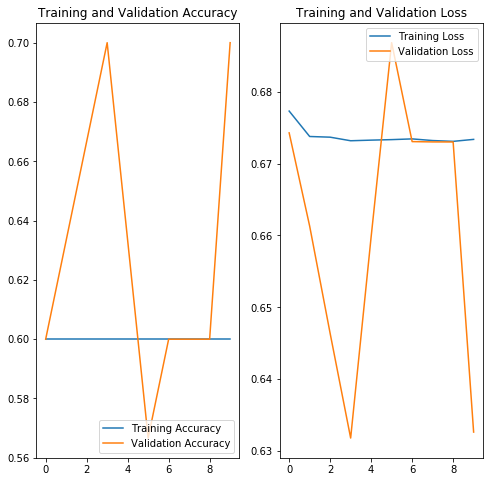

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()